<a href="https://colab.research.google.com/github/Bhargavi9820/CodeClause_sentimental_analysis/blob/main/Sentiment_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
test_df = pd.read_csv('test.csv',  encoding= 'unicode_escape')

In [ ]:
train_df = pd.read_csv('train.csv', encoding= 'unicode_escape')

In [ ]:
X_train = train_df['text'].values
y_train = train_df['sentiment'].values
X_test = test_df['text'].values
y_test = test_df['sentiment'].values

In [ ]:
# create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
# transform the training and testing data using the vectorizer
tfidf_train = tfidf_vectorizer.fit_transform(X_train.astype('U'))

In [ ]:
tfidf_test = tfidf_vectorizer.transform(X_test.astype('U'))

In [ ]:
# create a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)

In [ ]:
# predict the labels for the testing data
y_pred = pac.predict(tfidf_test)

In [ ]:
# train the classifier on the training data
pac .fit(tfidf_train, y_train)

In [ ]:
# calculate the accuracy of the model
accuracy = accuracy_score(y_test.astype(str), y_pred.astype(str))
print('Accuracy:', accuracy)

Accuracy: 0.4544132917964694


In [ ]:
# calculate the confusion matrix of the model
confusion = confusion_matrix(y_test.astype(str), y_pred.astype(str))
print('Confusion matrix:', confusion)

Confusion matrix: [[   0    0 1281    0]
 [   0  618  316   67]
 [   0  322  833  275]
 [   0   86  280  737]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test.astype(str), y_pred.astype(str))
labels = ['negative', 'neutral', 'positive']

<Axes: >

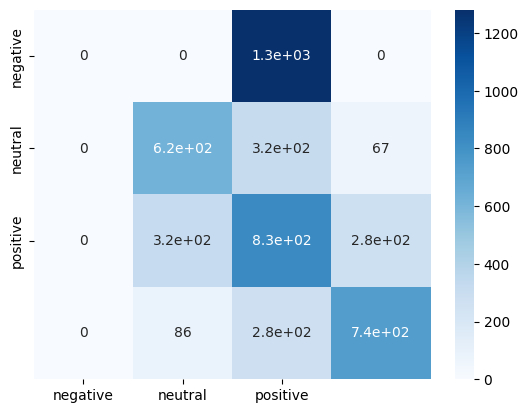

In [ ]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)